# Proyek Analisis Data

- Nama: Zulfaa Dwi Oktavian
- Email: a406ybm522@devacademy.id
- Id Dicoding: a406ybm522

## Pertanyaan Bisnis

- Berapa jumlah pelanggan di setiap state?
- Berapa jumlah penjual di setiap state?
- Produk Kategori apa yang paling banyak dibeli?
- Penjualan tertinggi pada tahun berapa?

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Menyiapkan semua library yang dibutuhkan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
customers_data = pd.read_csv("/content/drive/My Drive/Project Dashboard/Data/customers_dataset.csv")
customers_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
orders_data = pd.read_csv("/content/drive/My Drive/Project Dashboard/Data/orders_dataset.csv")
orders_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
sellers_data = pd.read_csv("/content/drive/My Drive/Project Dashboard/Data/sellers_dataset.csv")
sellers_data.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [6]:
geolocation_data = pd.read_csv("/content/drive/My Drive/Project Dashboard/Data/geolocation_dataset.csv")
geolocation_data.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [7]:
order_items_data = pd.read_csv("/content/drive/My Drive/Project Dashboard/Data/order_items_dataset.csv")
order_items_data.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [8]:
order_payments_data = pd.read_csv("/content/drive/My Drive/Project Dashboard/Data/order_payments_dataset.csv")
order_payments_data.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [9]:
order_reviews_data = pd.read_csv("/content/drive/My Drive/Project Dashboard/Data/order_reviews_dataset.csv")
order_reviews_data.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [10]:
products_data = pd.read_csv("/content/drive/My Drive/Project Dashboard/Data/products_dataset.csv")
products_data.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [63]:
product_category_name = pd.read_csv("/content/drive/My Drive/Project Dashboard/Data/product_category_name_translation.csv")
product_category_name.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


## Assessing Data

### Menilai tabel customers_data

In [11]:
customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Tidak terdapat tipe data yang salah dalam tabel customers.

In [27]:
print("Jumlah duplikasi: ", customers_data.duplicated().sum())
customers_data.describe(include="all")

Jumlah duplikasi:  0


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


Tidak terdapat duplikasi data pada tabel customers.

In [13]:
customers_data.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


Tidak terdapat missing value pada tabel customers.

### Menilai tabel orders_data

In [14]:
orders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Terdapat kesalahan tipe data ppada kolom order_purchase_timestamp , order_delivered_carrier_date, order_delivered_customer_date dan order_estimated_delivery_date yang seharusnya bertipe data datetime tetapi itu tipe datanya object.

In [29]:
print("Jumlah duplikasi: ", orders_data.duplicated().sum())
orders_data.describe(include="all")

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


Tidak terdapat duplikasi data pada tabel order.

In [16]:
orders_data.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


Terdapat missing value pada kolom order_approved_at sebanyak 160, order_delivered_carrier_date sebanyak 1783, dan order_delivered_customer_date sebanyak 2965.

### Menilai tabel order_items

In [34]:
order_items_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Terdapat kesalahan tipe data pada kolom shipping_limit_date yang seharusnya bertipe data datetime tetapi itu tipe datanya object.

In [35]:
print("Jumlah duplikasi: ", order_items_data.duplicated().sum())
order_items_data.describe(include="all")

Jumlah duplikasi:  0


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


Tidak terdapat duplikasi data pada tabel order_items.

In [36]:
order_items_data.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


Tidak terdapat missing value pada tabel order_items.

### Menilai tabel order_payments

In [37]:
order_payments_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


Tidak terdapat kesalahan tipe data pada tabel order_payments.

In [38]:
print("Jumlah duplikasi: ", order_payments_data.duplicated().sum())
order_payments_data.describe(include="all")

Jumlah duplikasi:  0


,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


Tidak terdapat duplikasi data pada tabel order_payments.

In [40]:
order_payments_data.isna().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


Tidak terdapat missing value pada tabel order_payments.

### Menilai tabel order_reviews

In [41]:
order_reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


Terdapat kesalahan tipe data pada kolom review_creation_date dan review_answer_timestamp yang seharusnya bertipe data datetime tetapi itu tipe datanya object.

In [42]:
print("Jumlah duplikasi: ", order_reviews_data.duplicated().sum())
order_reviews_data.describe(include="all")

Jumlah duplikasi:  0


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


Tidak terdapat duplikasi data pada tabel order_reviews.

In [43]:
order_reviews_data.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


Terdapat missing value pada kolom review_comment_title dan review_comment_message masing-masing sebanyak 87.656 dan 58.247.

### Menilai tabel sellers_data

In [17]:
sellers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


Tidak terdapat tipe data yang salah dalam tabel sellers

In [28]:
print("Jumlah duplikasi: ", sellers_data.duplicated().sum())
sellers_data.describe(include="all")

Jumlah duplikasi:  0


,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


Tidak terdapat duplikasi data pada tabel seller

In [25]:
sellers_data.isna().sum()

,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


Tidak terdapat missing value pada tabel seller

### Menilai tabel geolocation_dataset

In [31]:
geolocation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


Tidak terdapat tipe data yang salah dalam tabel geolocation

In [32]:
print("Jumlah duplikasi: ", geolocation_data.duplicated().sum())
geolocation_data.describe(include="all")

Jumlah duplikasi:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


Terdapat duplikasi data sebanyak 261831 dalam tabel geolocation

In [33]:
geolocation_data.isna().sum()

,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


Tidak terdapat missing value pada tabel geolocation

### Menilai tabel products_data

In [44]:
products_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


Tidak terdapat tipe data yang salah dalam tabel products.

In [45]:
print("Jumlah duplikasi: ", products_data.duplicated().sum())
products_data.describe(include="all")

Jumlah duplikasi:  0


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


Tidak terdapat duplikasi data pada tabel products.

In [46]:
products_data.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


Terdapat missing value pada kolom product_category_name sebanyak 610 product_name_lenght sebanyak 610, product_description_lenght sebanyak 610, product_photos_qty sebanyak 610, product_weight_g sebanaak 2, product_length_cm sebanyak 2, product_height_cm sebanyak 2 dan product_width_cm sebanyak 2.

### Menilai tabel product_category_name

In [65]:
product_category_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


Tidak terdapat tipe data yang salah dalam tabel product category name.

In [66]:
print("Jumlah duplikasi: ", product_category_name.duplicated().sum())
product_category_name.describe(include="all")

Jumlah duplikasi:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


Tidak terdapat duplikasi data pada tabel product category name.

In [67]:
product_category_name.isna().sum()

,0
product_category_name,0
product_category_name_english,0


Tidak terdapat missing value pada tabel product_category_name

## Cleaning Data

### Mengubah tipe data pada tabel orders, order_items, dan order_review menjadi datetime.

In [48]:
#Tabel orders_data
orders_data['order_purchase_timestamp'] = pd.to_datetime(orders_data['order_purchase_timestamp'])
orders_data['order_delivered_carrier_date'] = pd.to_datetime(orders_data['order_delivered_carrier_date'])
orders_data['order_delivered_customer_date'] = pd.to_datetime(orders_data['order_delivered_customer_date'])
orders_data['order_estimated_delivery_date'] = pd.to_datetime(orders_data['order_estimated_delivery_date'])

#Tabel order_items
order_items_data['shipping_limit_date'] = pd.to_datetime(order_items_data['shipping_limit_date'])

#Tabel order_reviews
order_reviews_data['review_creation_date'] = pd.to_datetime(order_reviews_data['review_creation_date'])
order_reviews_data['review_answer_timestamp'] = pd.to_datetime(order_reviews_data['review_answer_timestamp'])

In [49]:
orders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](4), object(4)
memory usage: 6.1+ MB


In [50]:
order_items_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [51]:
order_reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


Tipe data sudah sesuai semua.

### Mengatasi missing value pada tabel orders_data, order_reviews_data, dan products_data




In [55]:
# Orders_data
column = orders_data[['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']].isna().any(axis=1)

# Tambah 15 menit ke order_purchase_timestamp yang tidak kosong
orders_data.loc[column, ['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']] = (
    pd.to_datetime(orders_data.loc[column, 'order_purchase_timestamp']) + pd.to_timedelta('15 minutes')
)

#Order_reviews_data
order_reviews_data['review_comment_title'].fillna(value="Tidak ada title", inplace=True)
order_reviews_data['review_comment_message'].fillna(value="Tidak ada Comment", inplace=True)

#Prodcucts_data
products_data.dropna(inplace=True)

<ipython-input-55-cd5c75cc93ac>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_reviews_data['review_comment_title'].fillna(value="Tidak ada title", inplace=True)
<ipython-input-55-cd5c75cc93ac>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[c

In [56]:
orders_data.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


In [57]:
order_reviews_data.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,0
review_comment_message,0
review_creation_date,0
review_answer_timestamp,0


In [58]:
products_data.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


Sudah tidak terdapat missing value pada semua dataset.

# Exploratory Data Analysis

### Mengetahui Jumlah Customer Berdasarkan State

In [77]:
# Menghitung jumlah customer_unique_id per customer_state
customers_count = customers_data.groupby('customer_state')['customer_unique_id'].nunique().reset_index()

# Mengubah nama kolom agar lebih jelas
customers_count.columns = ['customer_state', 'total_customers']

# Menampilkan hasil
#print(customers_count)

# Mengurutkan berdasarkan jumlah pelanggan terbanyak dan mengambil 10 teratas
top_10_customer_states = customers_count.sort_values(by='total_customers', ascending=False).head(10)

# Menampilkan hasil
print(top_10_customer_states)

   customer_state  total_customers
25             SP            40302
18             RJ            12384
10             MG            11259
22             RS             5277
17             PR             4882
23             SC             3534
4              BA             3277
6              DF             2075
7              ES             1964
8              GO             1952


### Mengetahui Jumlah Seller Berdasarkan State

In [75]:
# Menghitung jumlah seller_id per seller_state
sellers_count = sellers_data.groupby('seller_state')['seller_id'].nunique().reset_index()

# Mengubah nama kolom agar lebih jelas
sellers_count.columns = ['seller_state', 'total_seller']

# Menampilkan hasil
# print(sellers_count)

# Mengurutkan berdasarkan jumlah pelanggan terbanyak dan mengambil 10 teratas
top_10_seller_states = sellers_count.sort_values(by='total_seller', ascending=False).head(10)

# Menampilkan hasil
print(top_10_seller_states)

   seller_state  total_seller
22           SP          1849
15           PR           349
8            MG           244
20           SC           190
16           RJ           171
19           RS           129
6            GO            40
4            DF            30
5            ES            23
2            BA            19


### Kategori produk yang paling banyak dibeli

In [69]:
# Menghitung jumlah pesanan per produk
products_order_count = order_items_data.groupby('product_id')['order_item_id'].count().reset_index()
products_order_count.columns = ['product_id', 'total_orders']

# Menggabungkan dengan tabel produk untuk mendapatkan nama kategori produk
merged_df = products_order_count.merge(products_data[['product_id', 'product_category_name']], on='product_id', how='left')

# Menggabungkan dengan tabel kategori untuk mendapatkan nama kategori dalam bahasa Inggris
final_df = merged_df.merge(product_category_name[['product_category_name', 'product_category_name_english']], on='product_category_name', how='left')

# Mengurutkan berdasarkan jumlah pesanan terbanyak
top_products = final_df.sort_values(by='total_orders', ascending=False)

# Menampilkan 10 produk paling banyak dipesan
#print(top_products.head(10))

# Menghitung total pesanan per kategori produk
category_order_count = final_df.groupby('product_category_name_english')['total_orders'].sum().reset_index()

# Mengurutkan dari kategori dengan jumlah pesanan terbanyak
category_order_count = category_order_count.sort_values(by='total_orders', ascending=False)

# Menampilkan 10 kategori produk yang paling banyak dipesan
print(category_order_count.head(10))

   product_category_name_english  total_orders
7                 bed_bath_table         11115
43                 health_beauty          9670
65                sports_leisure          8641
39               furniture_decor          8334
15         computers_accessories          7827
49                    housewares          6964
70                 watches_gifts          5991
68                     telephony          4545
42                  garden_tools          4347
5                           auto          4235


### Mengetahui jumlah order per tahun

In [70]:
# Mengekstrak tahun dari shipping_limit_date
order_items_data['year'] = order_items_data['shipping_limit_date'].dt.year

# Menghitung jumlah order per tahun
order_count_by_year = order_items_data.groupby('year')['order_id'].nunique().reset_index()

# Mengurutkan berdasarkan jumlah order tertinggi
order_count_by_year = order_count_by_year.sort_values(by='order_id', ascending=False)

# Menampilkan tahun dengan jumlah order tertinggi
print(order_count_by_year)

   year  order_id
2  2018     54771
1  2017     43580
0  2016       312
3  2020         3


## Visualization

### 1. Berapa jumlah customer berdasarkan state?

<ipython-input-79-5a951c94106a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_customers', y='customer_state', data=top_10_customer_states, palette='Blues_r')


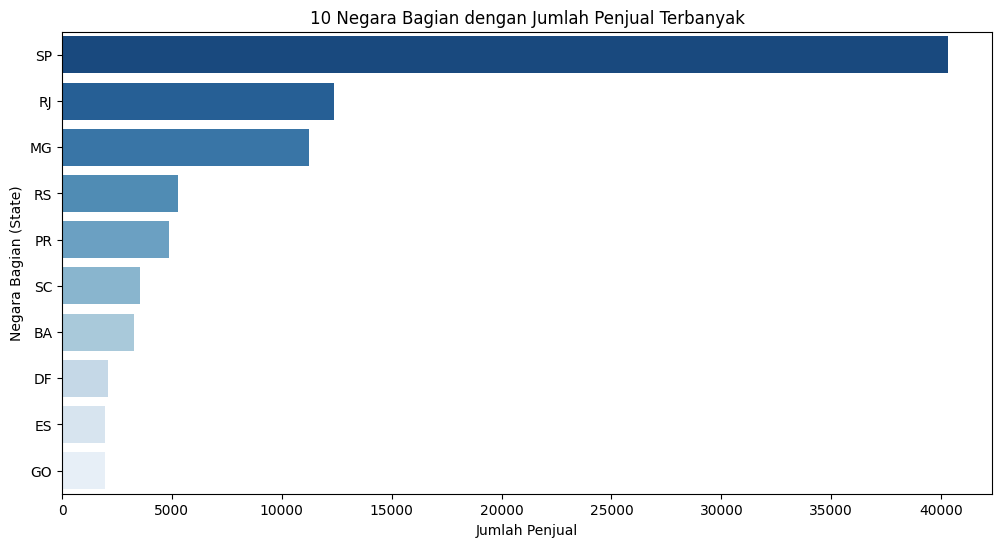

In [79]:
# Visualisasi
plt.figure(figsize=(12,6))
sns.barplot(x='total_customers', y='customer_state', data=top_10_customer_states, palette='Blues_r')

# Menambahkan label dan judul
plt.xlabel('Jumlah Penjual')
plt.ylabel('Negara Bagian (State)')
plt.title('10 Negara Bagian dengan Jumlah Penjual Terbanyak')

# Menampilkan grafik
plt.show()

### 2. Berapa jumlah seller berdasarkan state?

<ipython-input-80-656a6827fffc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_seller', y='seller_state', data=top_10_seller_states, palette='Oranges_r')


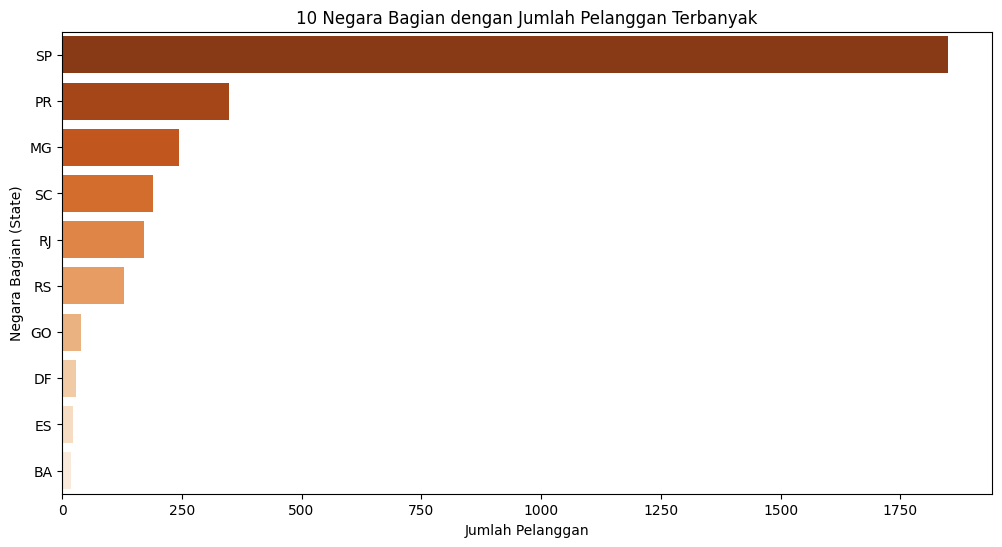

In [80]:
# Visualisasi dengan seaborn
plt.figure(figsize=(12,6))
sns.barplot(x='total_seller', y='seller_state', data=top_10_seller_states, palette='Oranges_r')

# Menambahkan label dan judul
plt.xlabel('Jumlah Pelanggan')
plt.ylabel('Negara Bagian (State)')
plt.title('10 Negara Bagian dengan Jumlah Pelanggan Terbanyak')

# Menampilkan grafik
plt.show()

### 3. Kategori Produk yang paling banyak dibeli

<ipython-input-81-970ecc708bd8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_orders', y='product_category_name_english', data=top_10_categories, palette='viridis')


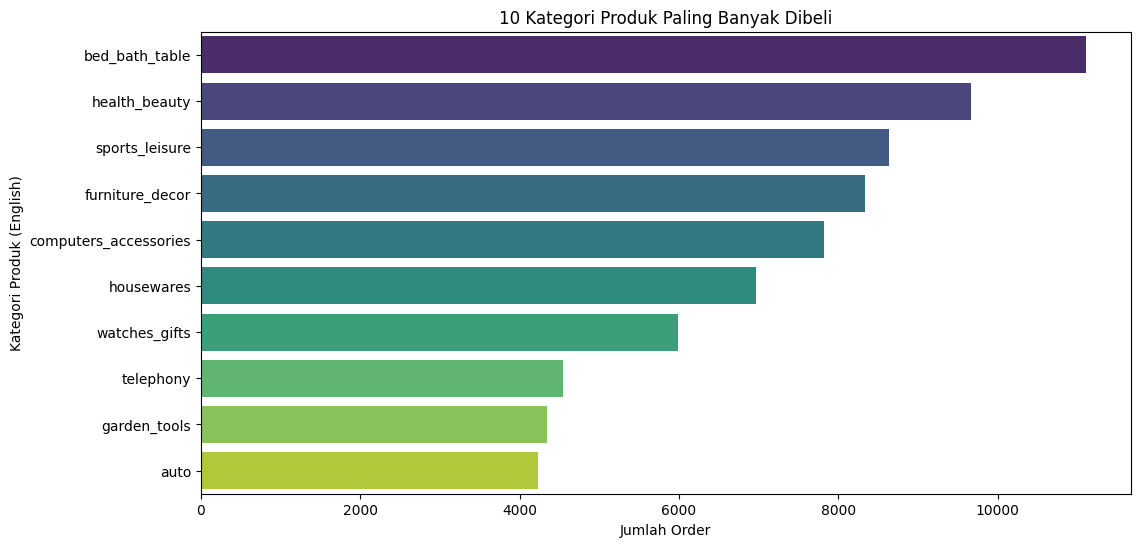

In [81]:
# Pilih 10 kategori produk terlaris
top_10_categories = category_order_count.head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='total_orders', y='product_category_name_english', data=top_10_categories, palette='viridis')
plt.xlabel('Jumlah Order')
plt.ylabel('Kategori Produk (English)')
plt.title('10 Kategori Produk Paling Banyak Dibeli')
plt.show()

### 4. Jumlah order per tahun

<ipython-input-82-b8db995469b1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year', y='order_id', data=order_count_by_year, palette='coolwarm')


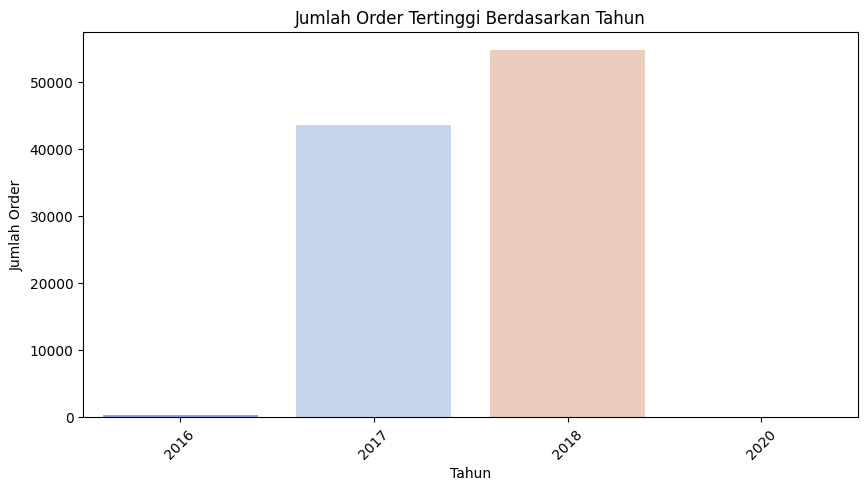

In [82]:
plt.figure(figsize=(10,5))
sns.barplot(x='year', y='order_id', data=order_count_by_year, palette='coolwarm')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Order')
plt.title('Jumlah Order Tertinggi Berdasarkan Tahun')
plt.xticks(rotation=45)
plt.show()

# Kesimpulan


1. Berdasarkan data jumlah pelanggan unik berdasarkan negara bagian, Sao Paulo (SP) memiliki jumlah pelanggan terbanyak, yaitu 40.302 pelanggan, jauh melampaui negara bagian lainnya. Rio de Janeiro (RJ) berada di posisi kedua dengan 12.384 pelanggan, diikuti oleh Minas Gerais (MG) dengan 11.259 pelanggan. Ketiga negara bagian ini menunjukkan dominasi yang signifikan dalam jumlah pelanggan dibandingkan dengan wilayah lain.

2. Berdasarkan data jumlah penjual unik berdasarkan negara bagian, Sao Paulo (SP) mendominasi dengan jumlah penjual terbanyak, yaitu 1.849 penjual, jauh melampaui negara bagian lainnya. Hal ini menunjukkan bahwa São Paulo tidak hanya menjadi pusat pelanggan terbesar tetapi juga pusat utama bagi penjual e-commerce. Di posisi kedua, Parana (PR) memiliki 349 penjual, diikuti oleh Minas Gerais (MG) dengan 244 penjual.

3. Berdasarkan data jumlah pesanan berdasarkan kategori produk, kategori "bed_bath_table" menempati posisi pertama dengan 11.115 pesanan, menunjukkan bahwa produk terkait perlengkapan tidur, kamar mandi, dan meja memiliki permintaan yang sangat tinggi. Di posisi kedua, kategori "health_beauty" mencatat 9.670 pesanan, yang mengindikasikan tingginya minat pelanggan terhadap produk kesehatan dan kecantikan, kemungkinan besar didorong oleh kebutuhan sehari-hari dan tren perawatan diri. Sementara itu, kategori "sports_leisure" berada di peringkat ketiga dengan 8.641 pesanan, menandakan bahwa produk olahraga dan rekreasi juga memiliki pangsa pasar yang kuat, kemungkinan dipengaruhi oleh gaya hidup aktif dan meningkatnya kesadaran akan kesehatan.

4. Berdasarkan data jumlah pesanan per tahun, tahun 2018 mencatat jumlah pesanan tertinggi dengan 54.771 pesanan, menunjukkan pertumbuhan signifikan dalam e-commerce dibandingkan tahun sebelumnya. Di posisi kedua, tahun 2017 mencatat 43.580 pesanan, yang juga merupakan angka yang cukup besar, menandakan bahwa tren belanja online sudah berkembang pesat dalam periode tersebut. Sementara itu, tahun 2016 hanya mencatat 312 pesanan, yang menunjukkan bahwa e-commerce masih dalam tahap awal pertumbuhan